In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

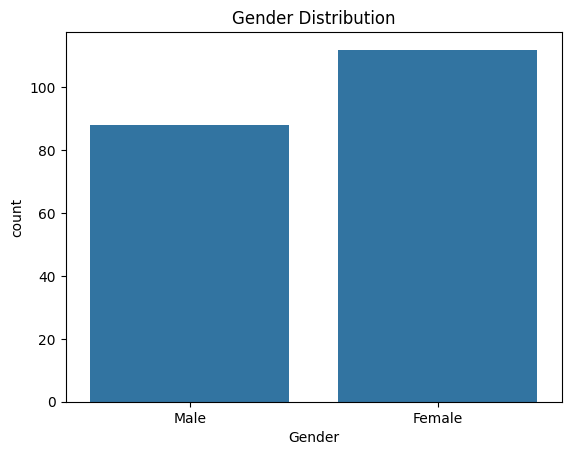

In [ ]:
# Gender distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()


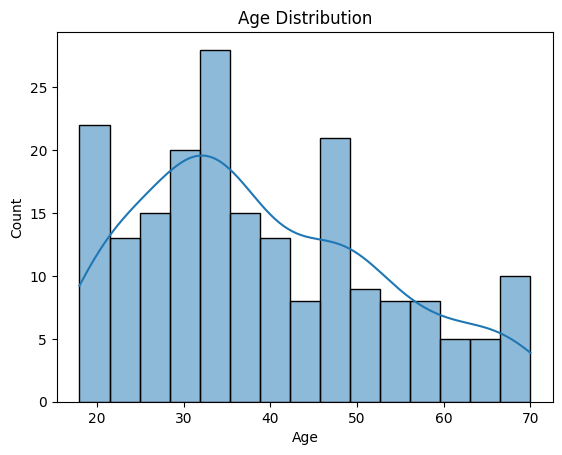

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

In [ ]:
# 4. Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# 5. Elbow Method to find Optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

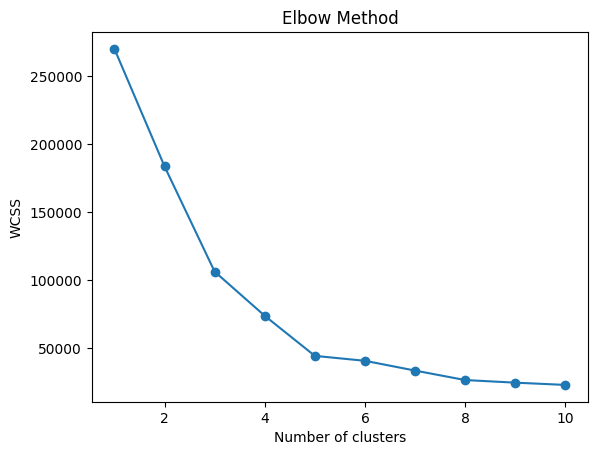

In [ ]:
# Plot Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# 6. Apply K-Means with Optimal K
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
# Add cluster info to dataset
df['Cluster'] = y_kmeans

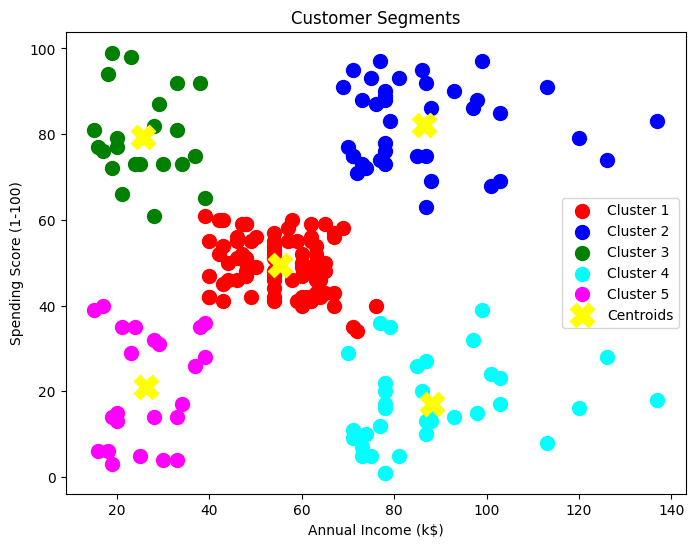

In [ ]:
# 7. Visualize Clusters
X_values = X.values  # Convert DataFrame to NumPy array

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X_values[y_kmeans == i, 0], X_values[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
# 8. Interpret Clusters
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# **Conclusion** :

High Income – High Spending (VIP Customers) → Loyal, profitable, priority for premium offers.

High Income – Low Spending → Potential targets for engagement campaigns.

Low Income – High Spending (Impulsive Buyers) → Respond well to promotions and discounts.

Low Income – Low Spending → Price-sensitive customers; focus on budget-friendly products.

Moderate Income – Moderate Spending → Stable middle segment, maintain with regular offers.